In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
# Tải lên dữ liệu New Customer từ file excel

new_cust = pd.read_excel('Raw_data.xlsx', sheet_name='NewCustomerList')

In [4]:
# Kiểm tra 5 bản ghi đầu tiên từ dữ liệu New Customer

new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [9]:
# Thông tin về các cột và kiểu dữ liệu của dữ liệu New Customer

new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

<b>Ta thấy kiểu dữ liệu cột dữ liệu DOB không phải là định dạng datetime64, nên cần phải chuyển từ kiểu dữ liệu object sang datetime64. </br>
Sau khi thay đổi kiểu dữ liệu của cột DOB thì các kiểu dữ liệu của các cột dữ liệu đặt trưng đã ổn. Tuy nhiên, 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', và 'Unnamed: 20' là những cột không liên quan. Do đó, chúng cần được loại bỏ.</b>

## Tổng số bản ghi

In [10]:
# Tổng số hàng và cột trong tập dữ liệu

print('Total records (row) in the dataset: {}'.format(new_cust.shape[0]))
print('Total columns in the dataset: {}'.format(new_cust.shape[1]))

Total records (row) in the dataset: 1000
Total columns in the dataset: 23


## Các cột số và các cột không phải số

In [11]:
# Lấy ra các cột số
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)

# Lấy ra các cột không phải số
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


## 1. Thay đổi kiểu dữ liệu và loại bỏ các cột không liên quan

<b>Thay đổi kiểu dữ liệu cho cột DOB, từ object sang datetime64</b>

In [12]:
# Thay đổi kiểu dữ liệu

new_cust['DOB'] = new_cust['DOB'].astype('datetime64[ns]')

<b>'Cột Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', và 'Unnamed: 20' là các cột không liên quan. Do đó, chúng nên được loại bỏ.</b>

In [13]:
# Loại bỏ cột dữ liệu thừa

new_cust.drop(labels=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [14]:
# Kiểm tra

new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

## 2. Kiểm tra giá trị bị thiếu

Kiểm tra xem tập dữ liệu có tồn tại bất kỳ giá trị thiếu nào không. Nếu giá trị thiếu xuất hiện cho một cột cụ thể, tùy thuộc vào tình huống thì: 
- Cột đó có thể bị loại bỏ (trong trường hợp một số lượng lớn dữ liệu bị thiếu) 
- Có thể loại bỏ giá trị thiếu đó (trong trường hợp một số lượng ít dữ liệu bị thiếu)
- Một giá trị phù hợp sẽ được điền vào cột có giá trị thiếu

In [15]:
# Tổng số giá trị bị thiếu

new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [16]:
# Tỉ lệ phần trăm giá trị bị thiếu

new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

Sau khi thực hiện kiểm tra ở trên chúng ta thấy có các cột như: <b>last_name, DOB, job_title, job_industry_category</b> có giá trị null.

### 2.1. Cột Last Name

<b>Vì tất cả các khách hàng đều có first_name, nên tất cả các khách hàng đều có thể được xác định. Vì vậy, việc không có last_name vẫn chấp nhận được. Điền các last_name rỗng bằng "None".</b>

In [17]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [18]:
# Các bản ghi có giá trị rỗng của cột last_name

new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [97]:
# Điền các last_name rỗng bằng 'None'

new_cust['last_name'] = new_cust.loc[:, 'last_name'].fillna('None')

In [98]:
# Kiểm tra lại số lượng last_name rỗng

new_cust['last_name'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột Last Name.

### 2.2. Ngày sinh (DOB)

In [22]:
# Lọc giá trị rỗng trong cột DOB

new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [27]:
# Tỉ lệ phần trăm giá trị rỗng trong cột DOB

round(new_cust['DOB'].isnull().mean()*100)

2

<b>Dữ liệu ngày sinh bị thiếu ít hơn 5%, nên chúng ta có thể loại bỏ các bản ghi bị thiếu</b>

In [28]:
# Lấy chỉ mục của các bản ghi mà ngày sinh (DOB) là null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [29]:
# Xóa các bản ghi đó

new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [30]:
# Kiểm tra lại số lượng giá trị null

new_cust['DOB'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho ngày sinh (DOB).

### Tạo cột tuổi(Age) để kiểm tra sự không nhất quán trong dữ liệu.

In [31]:
# Hàm tính tuổi của khách hàng tính đến ngày hôm nay.

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

<b>Thống kê mô tả của cột Age</b>

In [33]:
new_cust['Age'].describe().round(3)

count    983.000
mean      52.516
std       17.044
min       22.000
25%       40.500
50%       52.000
75%       66.000
max       85.000
Name: Age, dtype: float64

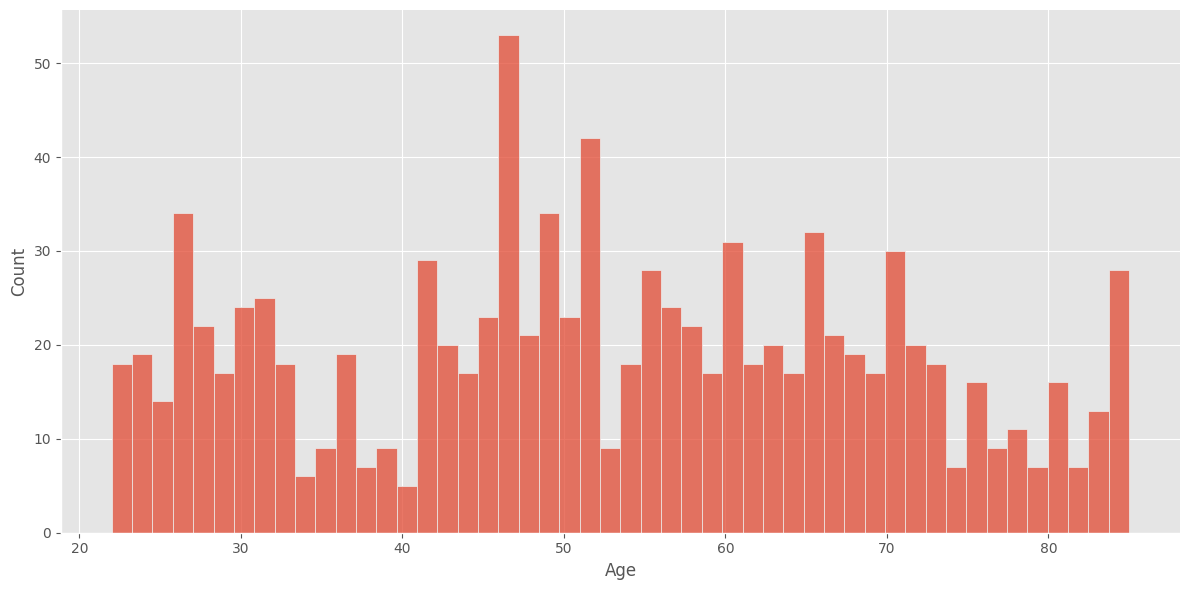

In [38]:
# Trực quan hóa để tìm phân phối Tuổi.

sns.displot(new_cust['Age'], bins=50, height=6, aspect=2)

<b>Dựa vào trường tuổi của biểu đồ và thống kê mô tả, không có sự không nhất quán trong dữ liệu.</b>

### Tạo cột nhóm tuổi (Age Group)

In [54]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

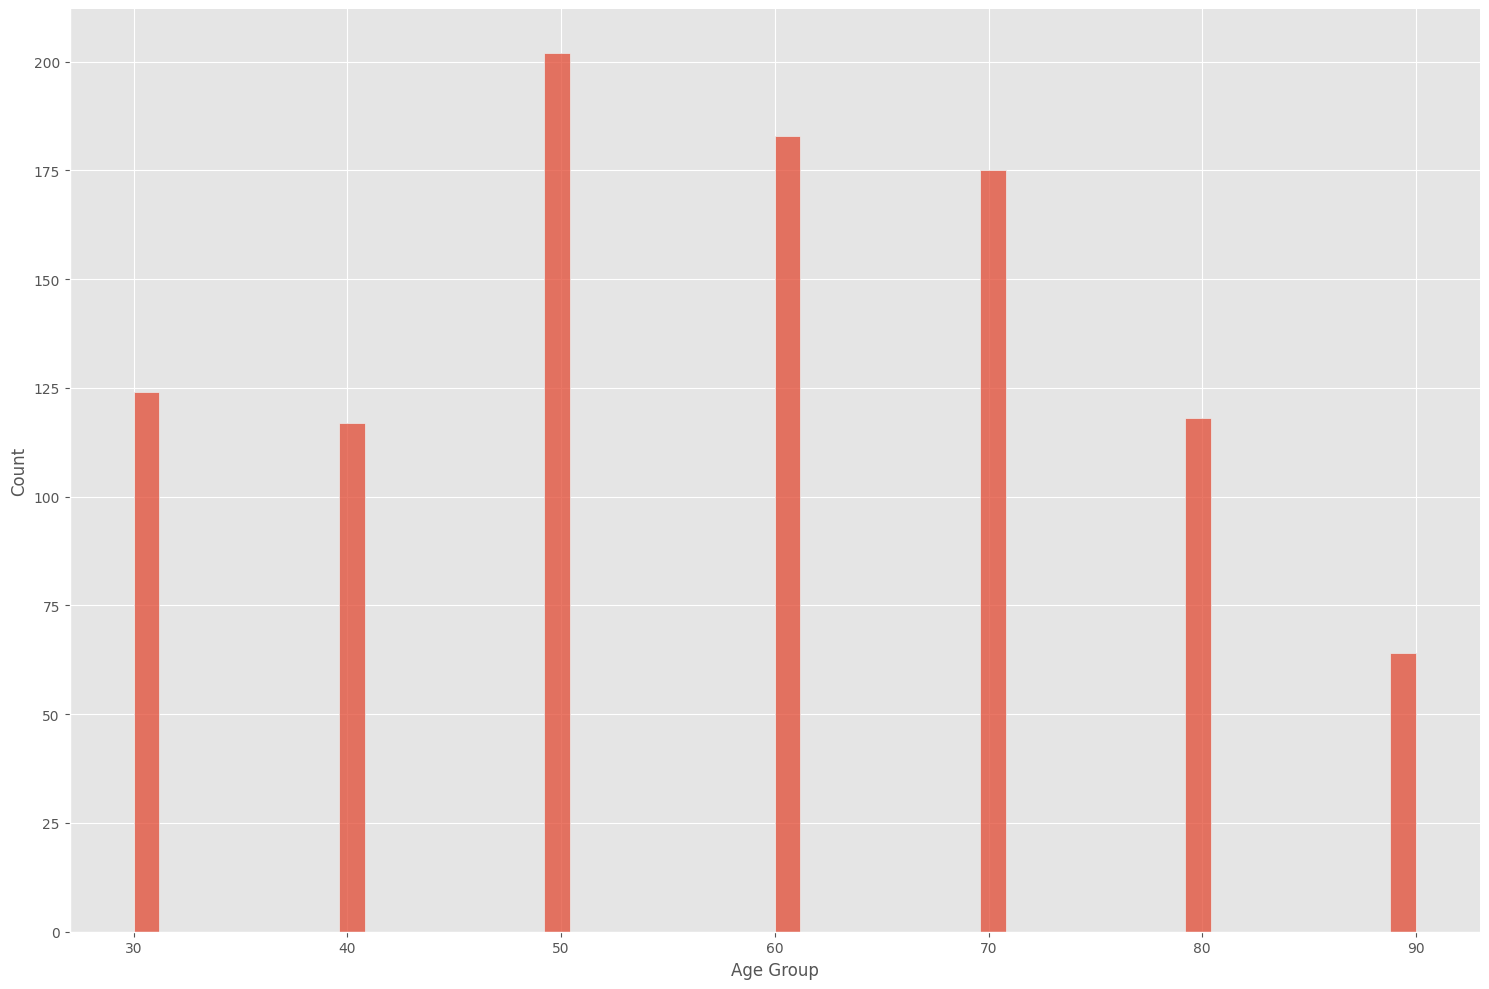

In [59]:
# Trực quan hóa để tìm phân phối của Nhóm Tuổi.

sns.displot(new_cust['Age Group'], bins=50, height=10, aspect=1.5)

<b>Phần lớn số lượng Khách hàng mới đến thuộc Nhóm Tuổi 50-59.</b>

### 2.3. Cột Job Title

In [61]:
# Lọc các giá trị rỗng trong cột job_title

new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,70,80
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,78,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,63,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,44,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,45,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,46,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,61,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,25,30


In [62]:
# Tỉ lệ phần trăm giá trị rỗng trong cột job_title

round(new_cust['job_title'].isnull().mean()*100)

11

<b>Vì tỷ lệ giá trị thiếu của cột job_title là 11%, chúng ta sẽ thay thế các giá trị null bằng "Missing".</b>

In [63]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [65]:
# Kiểm tra có còn giá trị rỗng trong cột không

new_cust['job_title'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột job_title.

### 2.4. Cột Job Industry Category

In [66]:
# Lọc các giá trị rỗng trong cột job_industry_category

new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,26,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,46,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,42,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,56,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,57,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,57,60
971,Frieda,Tavinor,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,55,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,32,40


In [67]:
# Tỉ lệ phần trăm giá trị rỗng trong cột job_industry_category

round(new_cust['job_industry_category'].isnull().mean()*100)

17

<b>Vì tỷ lệ giá trị thiếu của cột job_industry_category là 17%, chúng ta sẽ thay thế các giá trị null bằng "Missing".</b>

In [68]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [69]:
# Kiểm tra có còn giá trị rỗng trong cột không

new_cust['job_industry_category'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột job_industry_category.

<b>Cuối cùng, không còn Giá trị Thiếu nào trong tập dữ liệu.</b>

In [70]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [71]:
# Tổng số bản ghi sau khi loại bỏ các giá trị thiếu

print('Total records after removing Missing Values: {}'.format(new_cust.shape[0]))

Total records after removing Missing Values: 983


## 3. Kiểm tra sự không nhất quán trong dữ liệu.

Chúng ta sẽ kiểm tra xem liệu có dữ liệu không nhất quán hoặc dữ liệu nhập sai / lỗi chính tả trong các cột phân loại.</br>
Các cột cần được kiểm tra là: <b>'gender', 'wealth_segment', 'deceased_indicator', 'owns_car'.</b>

### 3.1. Cột gender

Không có <b>dữ liệu không nhất quán</b> trong cột <b>gender</b>

In [73]:
new_cust['gender'].value_counts().reset_index()

,gender,count
0,Female,513
1,Male,470


### 3.2. Cột wealth_segment

Không có <b>dữ liệu không nhất quán</b> trong cột <b>wealth_segment</b>

In [75]:
new_cust['wealth_segment'].value_counts().reset_index()

,wealth_segment,count
0,Mass Customer,499
1,High Net Worth,249
2,Affluent Customer,235


### 3.3. Cột deceased_indicator

Không có <b>dữ liệu không nhất quán</b> trong cột <b>deceased_indicator</b>

In [76]:
new_cust['deceased_indicator'].value_counts().reset_index()

,deceased_indicator,count
0,N,983


### 3.4. Cột owns_car

Không có <b>dữ liệu không nhất quán</b> trong cột <b>owns_car</b>

In [77]:
new_cust['owns_car'].value_counts().reset_index()

,owns_car,count
0,No,497
1,Yes,486


### 3.5. Cột state

Không có <b>dữ liệu không nhất quán</b> trong cột <b>state</b>

In [78]:
new_cust['state'].value_counts().reset_index()

,state,count
0,NSW,499
1,VIC,258
2,QLD,226


### 3.6. Cột Country

Không có <b>dữ liệu không nhất quán</b> trong cột <b>Country</b>

In [79]:
new_cust['country'].value_counts().reset_index()

,country,count
0,Australia,983


### 3.7. Cột postcode

Không có <b>dữ liệu không nhất quán</b> trong cột <b>postcode</b>

In [80]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


### 3.8. Cột address

Không có <b>dữ liệu không nhất quán</b> trong cột <b>address</b>

In [81]:
new_cust[['address', 'postcode', 'state', 'country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


### 3.9. Cột tenure

Không có <b>dữ liệu không nhất quán</b> trong cột <b>tenure</b>. 

In [83]:
new_cust['tenure'].describe().round(3)

count    983.000
mean      11.460
std        5.006
min        1.000
25%        8.000
50%       11.000
75%       15.000
max       22.000
Name: tenure, dtype: float64

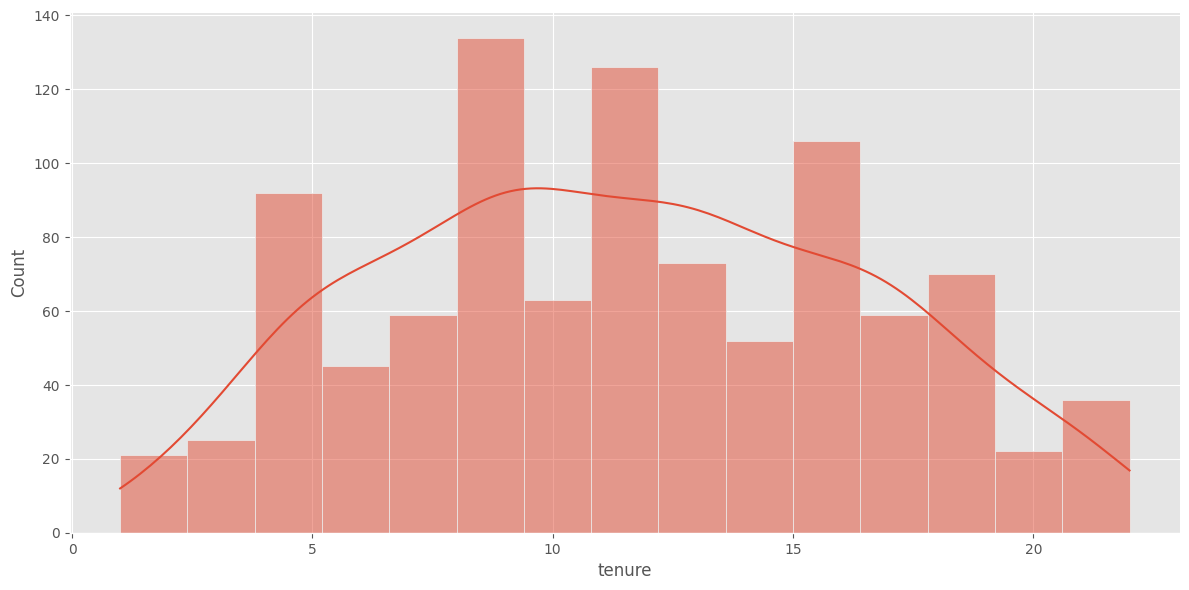

In [90]:
# Phân phối của cột tenure

sns.displot(new_cust['tenure'], kde=True, height=6, aspect=2)

## 4. Kiểm tra trùng lặp

Chúng ta cần đảm bảo rằng không có sự trùng lặp của bản ghi trong tập dữ liệu. Điều này có thể dẫn đến lỗi trong phân tích dữ liệu do chất lượng dữ liệu kém. Nếu có các hàng dữ liệu trùng lặp, chúng ta cần loại bỏ những bản ghi đó.</br>
Để kiểm tra sự trùng lặp của các bản ghi, trước tiên chúng ta cần loại bỏ cột khóa chính của tập dữ liệu, sau đó áp dụng hàm drop_duplicates() được cung cấp bởi Python.

In [92]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


<b>Vì cả hai giá trị đều giống nhau, nên không có bản ghi trùng lặp trong tập dữ liệu.</b>

## 5. Xuất tập dữ liệu New Customers đã được làm sạch sang định dạng csv

Tập dữ liệu New Customers đã được làm sạch. Do đó, chúng ta có thể xuất dữ liệu sang định dạng CSV để tiếp tục phân tích dữ liệu của phân khúc khách hàng bằng cách kết hợp nó với các bảng khác.

In [93]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)